# Gini Index and Lorenz Curve Algorithm

The purpose of this program is to calculate the Gini Coefficient and produce a Lorenze curve given a data set.

The Gini index(GI) and Lorenz Curve are usually used to measure the equality of a system or statistical evenness. The GI gives a number between 0 and 1. 0 is completely equal, and 1 is completely unequal. The GI can derived from the Lorenz Curve. However, the formula used to find the GI in this algorithm is below. 

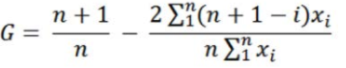

The Lorenz Curve plots the cumulative percentile of the population in an array on the x axis and the cumulative percentile of the total on the y axis. A line from (0,0) to (1,1) is the line of equality. The Lorenz curve will usually be below that line. Although, it can be equal to it. The area between the line of equality and the Lorenz Curve is how the GI is calculated. If there is no area between the two, the GI is 0. If there is nothing under the curve, it is 1.

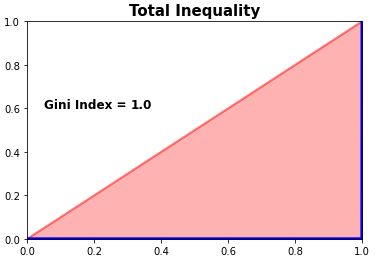
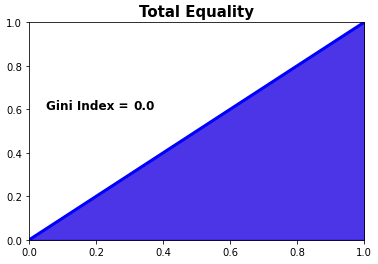

### Imports

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

In [259]:
test_array = [9,7,22,5,17]

### Gini Index and Lorenz Curve Algorithm

In [260]:
#A function that takes in an array and returns the Gini index and the Lorenz Curve
def Gini_and_Lorenz(an_array):
    #Sorts array from smallest to largest
    array_sorted = np.sort(an_array)
    #Finds sum of array
    array_sum = np.sum(an_array)
    
    #Finds the proportion of total for each value.
    proportion_ownership_of_total = []
    for i in array_sorted:
        proportion = (i / array_sum)
        proportion_ownership_of_total.append(proportion)
        
    #Returns an array that that gives the cumulative proportion of ownership.
    #The length of the final array should be the same length as x
    #This makes up the y values of the Lorenz Curve.
    #Ex. input = [1,2,3], output = [1/6 , (1+2)/6, (1+2+3)/6]
    cumulative_ownership = []
    for i in proportion_ownership_of_total:
        if np.sum(cumulative_ownership) == 0:
            first_proportion = i
            cumulative_ownership.append(first_proportion)
        else:
            proportion_to_left = i + cumulative_ownership[-1]
            cumulative_ownership.append(proportion_to_left)
            
    #Finds the cumulative proportion of the population.
    #This gives the x values for the Lorenz Curve.
    #Ex. input = [6,5,9], output = [1/3, 2/3, 3/3] 
    n = len(an_array)
    n_list = list(range(1,n+1))
    cumulative_population_percent = []
    for i in n_list:
        each_percent = i / n
        cumulative_population_percent.append(each_percent)
        
    #Compute the Gini Coefficient
    n_list_reversed = n_list[::-1]
    xi_times_nlistreversed = [i*j for i , j in zip(n_list_reversed,array_sorted)]
    numerator = 2*np.sum(xi_times_nlistreversed)
    denominator = n*array_sum
    G = ((n+1)/n) - numerator / denominator
    
    total_equality_y = [0,1]
    total_equality_x = [0,1]
    cumulative_ownership_0 = np.insert(cumulative_ownership, 0, 0)
    cumulative_population_percent_0 = np.insert(cumulative_population_percent, 0, 0)
    
    plot.plot(total_equality_x, total_equality_y, label = 'Line of Equality', 
              alpha = .5, color = 'r', linewidth = 2)
    plot.fill_between(total_equality_x, total_equality_y, alpha = .3, color = 'r')
    plot.plot(cumulative_population_percent_0,cumulative_ownership_0, 
              label = 'Lorenz Curve for Data', linewidth = 3, color = 'b')
    plot.fill_between(cumulative_population_percent_0,cumulative_ownership_0, 
                      color = 'b', alpha = .7)
    plot.legend()
    plot.title('Lorenz Curve',fontweight = 'bold', fontsize = 15)
    plot.margins(x=0, y=0)
    plot.text(.05,.6, 'Gini Index = ', fontweight = 'bold', fontsize = 12)
    plot.text(.31,.6, round(G, 2), fontweight = 'bold', fontsize = 12)
    
    return 

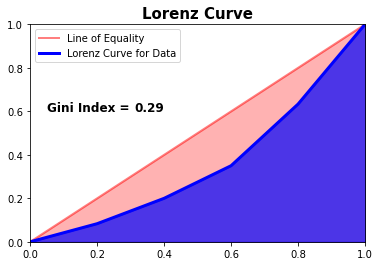

In [261]:
Gini_and_Lorenz(test_array)

# Gini Index Algorithm

The Gini Index is often used to measure equality in economics. The GI can be used to compare equality between two government, systems, or countries. Below is an algorithm that returns only the GI for instances where that is needed.

In [273]:
#An algorithm to determine the Gini Index of an array.
def gini_index(an_array):
    #Sorts array from smallest to largest
    array_sorted = np.sort(an_array)
    #Finds sum of array
    array_sum = np.sum(an_array)
  
    #Return n.
    n = len(an_array)
    #Returns a list of 1 to n.
    n_list = list(range(1,n+1))
        
    #Computes the Gini Coefficient
    n_list_reversed = n_list[::-1]
    xi_times_nlistreversed = [i*j for i , j in zip(n_list_reversed,array_sorted)]
    numerator = 2*np.sum(xi_times_nlistreversed)
    denominator = n*array_sum
    G = ((n+1)/n) - numerator / denominator
    
    return G

In [274]:
gini_index(test_array)

0.29333333333333333

### More Info


https://www.sciencedirect.com/topics/mathematics/lorenz-curve